In [1]:
apikey = "wBkWOy90budzobSlu_fSbwiTrf9JVb20"

In [2]:
from polygon import RESTClient
from local_settings import polygon as settings
from tqdm.notebook import tqdm
from joblib import Parallel,delayed
from polygon import RESTClient
import pandas as pd
import numpy as np
import os

In [3]:
client = RESTClient(apikey)

In [4]:
import pickle

def save(l,filename):
    with open(filename, 'wb') as f:
         pickle.dump(l, f)
            
            
def load(filename):
    with open(filename, 'rb') as g:
         l = pickle.load(g)
    return l

In [7]:
ticker = 'AAPL'

l = load('./minute_data_sp_500/{}/{}'.format(ticker,ticker))

In [16]:
def parse_agg(x):
    e = {}
    e['open'] = x.open
    e['high'] = x.high
    e['low'] = x.low
    e['close'] = x.close
    e['volume'] = x.volume
    e['vwap'] = x.vwap
    e['timestamp'] = x.timestamp
    e['transactions'] = x.transactions
    e['otc'] = x.otc
    return e

def parse_as_df(agg_list: list):
    
    d = {}
    x = agg_list[0]
    e = parse_agg(x)
    
    for k in e.keys():
        d[k] = []
        
    for x in tqdm(agg_list):
        e = parse_agg(x)
        for k in e.keys():
            d[k].append(e[k])
            
    df = pd.DataFrame.from_dict(d)
    
    df.index = df.timestamp
    df.drop('timestamp',axis = 1,inplace = True)
    
    return df
    
    

In [17]:
df_aapl = parse_as_df(l)

  0%|          | 0/1742090 [00:00<?, ?it/s]

In [18]:
df_aapl

,open,high,low,close,volume,vwap,transactions,otc
timestamp,,,,,,,,
1364815800000,15.7657,15.7657,15.7657,15.7657,2800.0,15.7657,1.0,None
1364815860000,15.7682,15.7682,15.7682,15.7682,2800.0,15.7682,1.0,None
1364816040000,15.7786,15.7786,15.7786,15.7786,2800.0,15.7786,1.0,None
1364816400000,15.7786,15.7786,15.7786,15.7786,4508.0,15.7786,1.0,None
1364816520000,15.7829,15.7850,15.7829,15.7850,28000.0,15.7847,4.0,None
...,...,...,...,...,...,...,...,...
1680006120000,157.7500,157.7600,157.5600,157.5600,9693.0,157.6627,245.0,None
1680006180000,157.5500,157.6800,157.5500,157.6800,1562.0,157.6300,48.0,None
1680006240000,157.6403,157.6800,157.6403,157.6800,938.0,157.6638,19.0,None


[Agg(open=15.7657, high=15.7657, low=15.7657, close=15.7657, volume=2800, vwap=15.7657, timestamp=1364815800000, transactions=1, otc=None),
 Agg(open=15.7682, high=15.7682, low=15.7682, close=15.7682, volume=2800, vwap=15.7682, timestamp=1364815860000, transactions=1, otc=None),
 Agg(open=15.7786, high=15.7786, low=15.7786, close=15.7786, volume=2800, vwap=15.7786, timestamp=1364816040000, transactions=1, otc=None),
 Agg(open=15.7786, high=15.7786, low=15.7786, close=15.7786, volume=4508, vwap=15.7786, timestamp=1364816400000, transactions=1, otc=None),
 Agg(open=15.7829, high=15.785, low=15.7829, close=15.785, volume=28000, vwap=15.7847, timestamp=1364816520000, transactions=4, otc=None),
 Agg(open=15.7846, high=15.7857, low=15.7846, close=15.7857, volume=23548, vwap=15.7856, timestamp=1364816880000, transactions=2, otc=None),
 Agg(open=15.7682, high=15.8036, low=15.7679, close=15.7857, volume=45164, vwap=15.7878, timestamp=1364817600000, transactions=15, otc=None),
 Agg(open=15.7882,

In [24]:
# number of expected training data roughly

60

In [25]:
l[0]

Agg(open=15.7657, high=15.7657, low=15.7657, close=15.7657, volume=2800, vwap=15.7657, timestamp=1364815800000, transactions=1, otc=None)

In [26]:
l_time = [x.timestamp for x in l]

In [32]:
l_date = [pd.Timestamp(x,unit = 'ms').date() for x in l_time]

<AxesSubplot:>

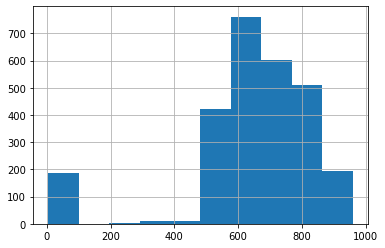

In [51]:
pd.Series(l_date).value_counts().hist()

In [55]:
# More than  90% of days have atleast 8.33 hours of minute data per day

(pd.Series(l_date).value_counts() > 500).sum()/(len(set(l_date)))

0.9100666173205033

In [45]:
#Total timespan of data

pd.Timestamp(l_time[-1],unit = 'ms') - pd.Timestamp(l_time[0],unit = 'ms')  

Timedelta('3648 days 00:56:00')

In [50]:
# Number of unique days for which we have data

len(set(l_date))

2702